# Advanced tutorial: NLOS reconstruction from phasor captures

<div class="admonition important alert alert-block alert-warning">

This tutorial is related to the one in `examples/render/3-freq-space`, using its simulated data.

</div>

## Overview

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>
  
  Import `y-tal` and load capture data in frequency space.
  
  </li>
  <li>
  
  Visualize the impulse response in frequency space.
  
  </li>
  <li>
  
  Use the `pf_dev` reconstruction implementation with data in frequency space.
  
  </li>
</ul>

</div>

You might want to work in frequency space if your data is very large and you work with phasor-field-based methods (it's lighter to store ~100 phasors than the full ~4000 time bin temporal respose).

In [12]:
import tal

data = tal.io.read_capture('data/tal/z-single-64x64-freq.hdf5')
print(data.H.shape)
print(data.H_format) # F stands for frequency domain, all other data have T for time domain

(104, 64, 64)
HFormat.F_Sx_Sy


In [13]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


In [5]:
print(data.H.shape)

(104, 64, 64)


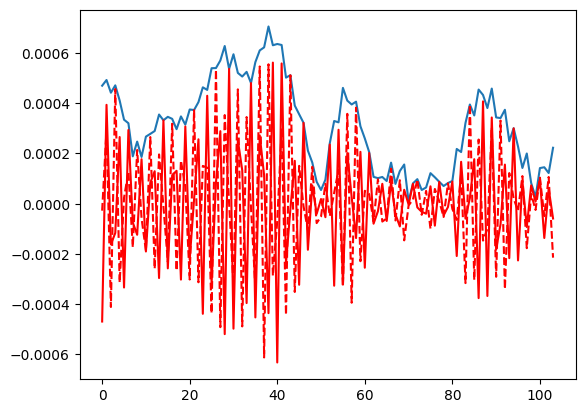

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.abs(data.H[:, 0, 0]))
plt.plot(np.real(data.H[:, 0, 0]), c='r')
plt.plot(np.imag(data.H[:, 0, 0]), c='r', linestyle='--')

<div class="admonition important alert alert-block alert-warning">

Really important to set `border=None` so that the simulated frequencies in the captured data match exactly with the ones in the reconstruction method

</div>

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 104 wavelengths from 0.0399m to 0.1205m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Skipping FFT for H_0
tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 104/104 [00:00<00:00, 770.18it/s]


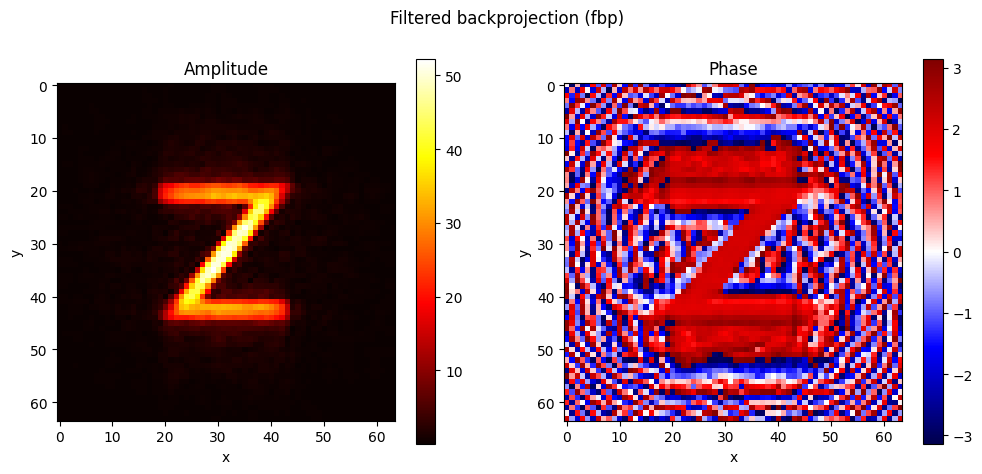

In [16]:
H_1 = tal.reconstruct.pf_dev.solve(data, wl_mean=0.06, wl_sigma=0.06, border=None,
                                volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp)')